<a href="https://colab.research.google.com/github/Jeanne013/jeanne013.github.io/blob/main/CSIT359_class1_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# only run once
!git clone https://github.com/profliuhao/CSIT359.git

fatal: destination path 'CSIT359' already exists and is not an empty directory.


# CSIT 359 Class 1 Example: Analysis of Titanic Data Set

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20


In [11]:
# train = pd.read_csv('datasets/titanic/train.csv')
train = pd.read_csv('/content/CSIT359/Module_1/CSIT359_class1_example/class1_example/datasets/titanic/train.csv')

In [12]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived: 1 = Yes, 0= No

Pclass (Passenger Class): 1,2,3

Sex: Male, Female

Embarked (Port of Embarkation): C = Cherbourg, Q = Queenstown, S = Southampton

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Freq')

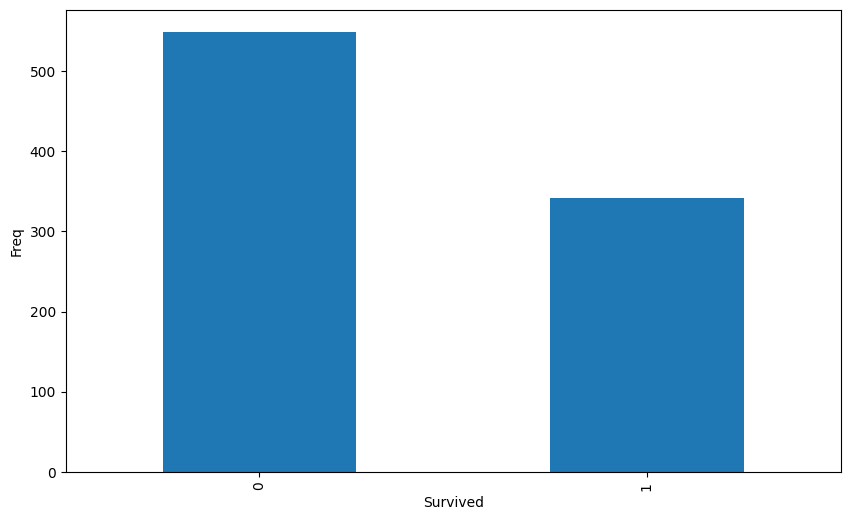

In [16]:
ax = train.groupby(by='Survived')['PassengerId'].count().plot.bar()
ax.set_ylabel('Freq')

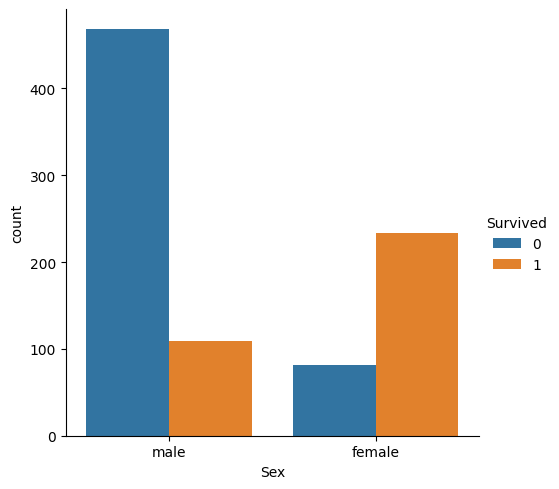

In [17]:
sns.catplot(x='Sex',hue='Survived',kind='count',data=train)

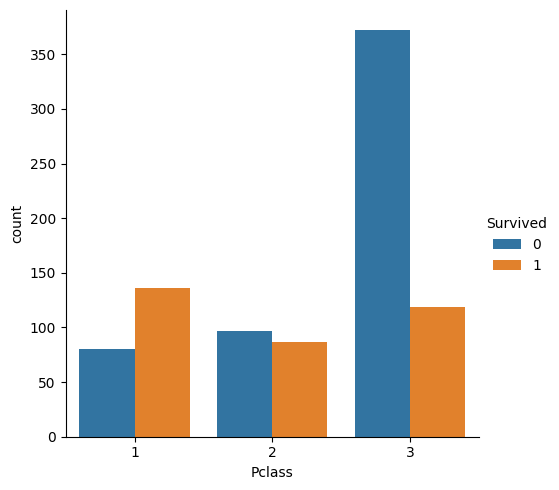

In [18]:
sns.catplot(x='Pclass',hue='Survived',kind='count',data=train)

<Axes: xlabel='Survived'>

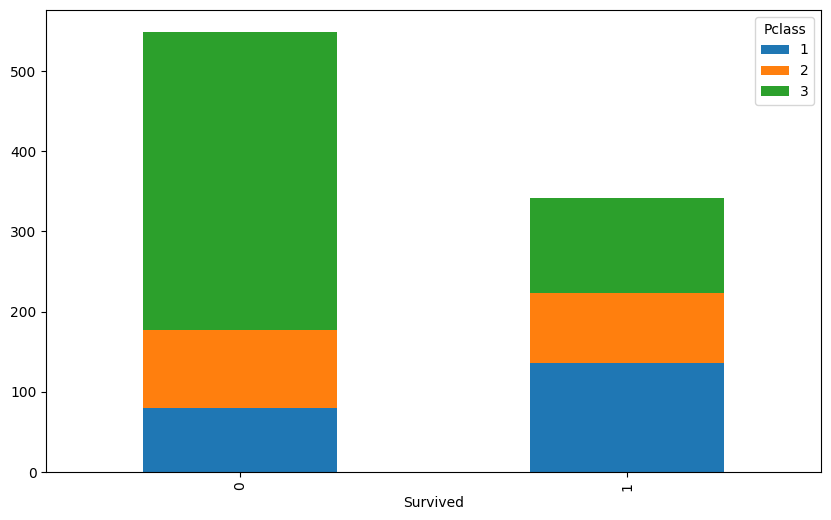

In [19]:
train.groupby(by=['Survived','Pclass'])['PassengerId'].count().unstack().plot.bar(stacked=True)

<Axes: xlabel='Survived'>

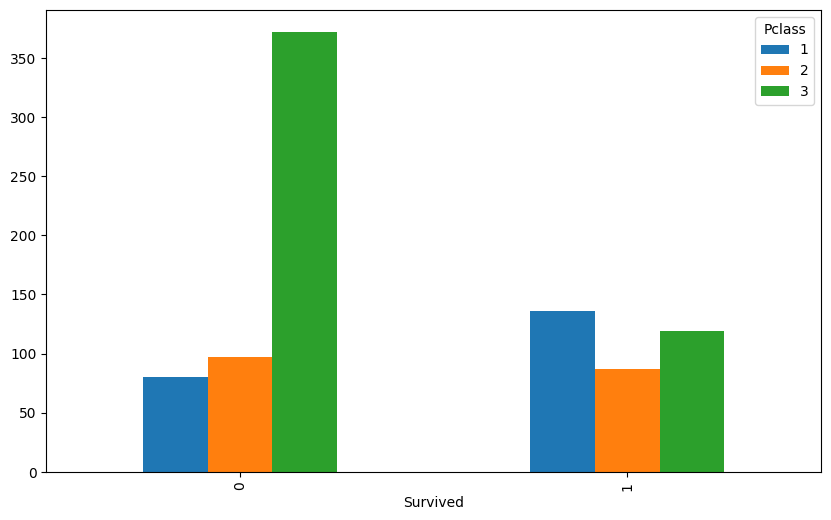

In [20]:
train.groupby(by=['Survived','Pclass'])['PassengerId'].count().unstack().plot.bar()

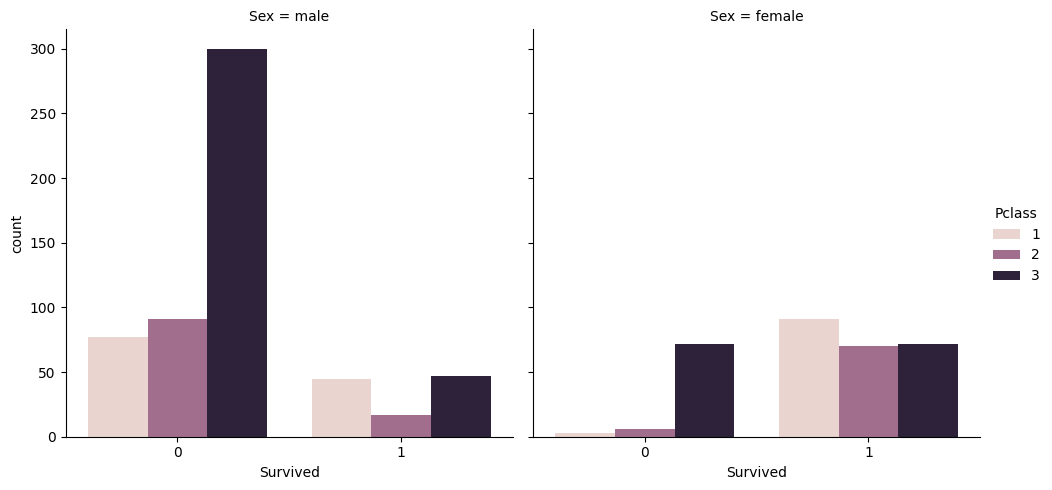

In [21]:
sns.catplot(x='Survived',hue='Pclass',kind='count',col = 'Sex',data=train)

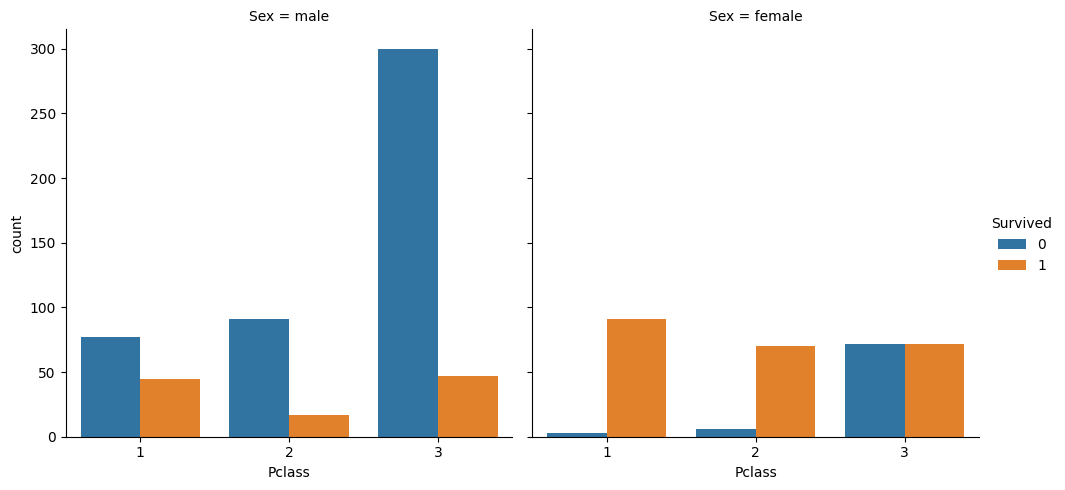

In [22]:
sns.catplot(x='Pclass',hue='Survived',kind='count',col = 'Sex',data=train)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


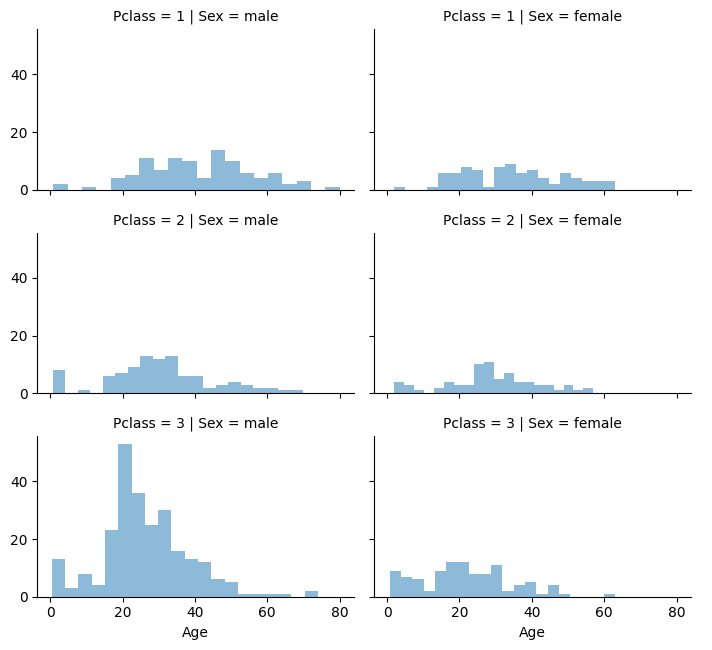

In [24]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', height=2.2, aspect=1.6)  # The size parameter has been renamed to height
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [25]:
def convert_age (row):
    if row['Age'] < 18:
        return 'Child'
    if row['Age'] >= 18:
        return 'Adult'
    else:
        return 'NA'

In [26]:
train['Type'] = train.apply(lambda row: convert_age (row),axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


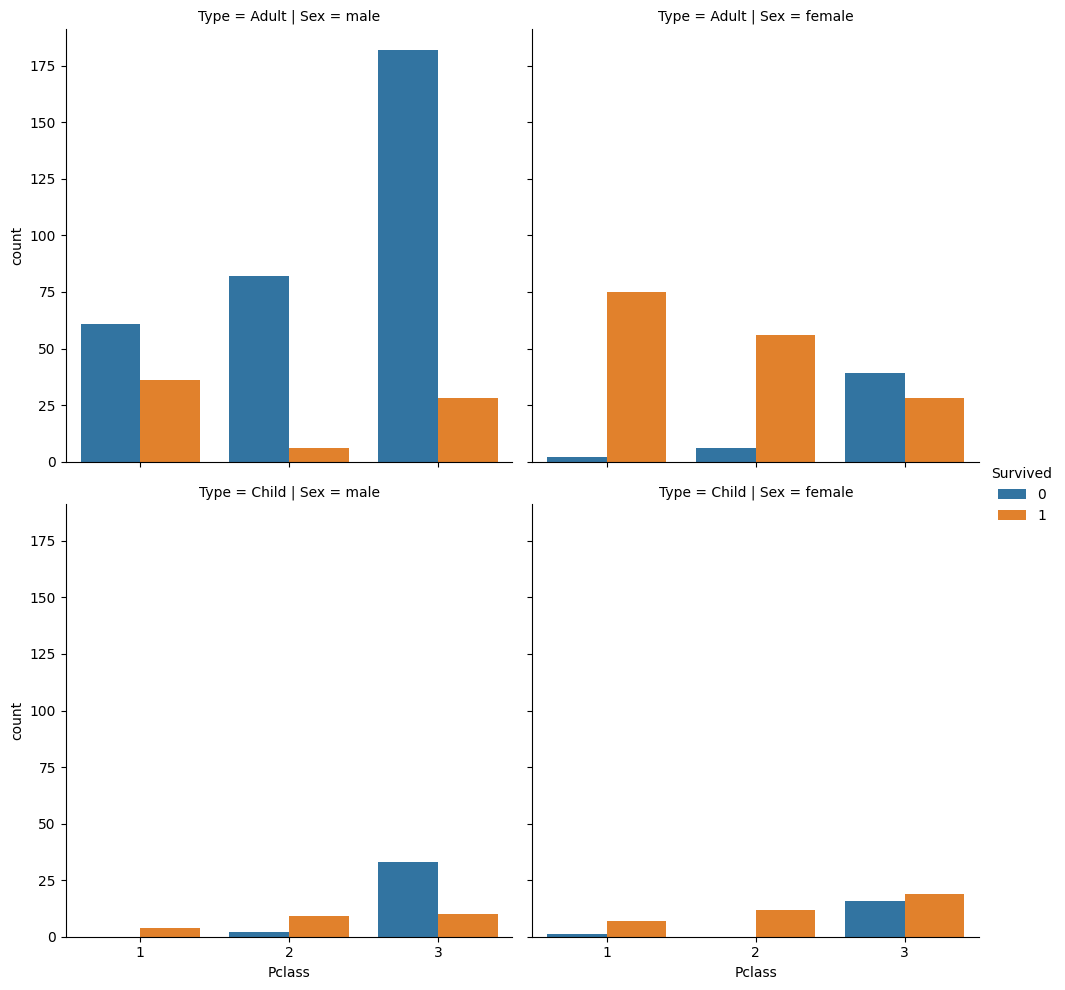

In [28]:
df = train[train['Type']!= 'NA']
sns.catplot(x='Pclass',hue='Survived',kind='count',row = 'Type',col ='Sex',data=df)

In [29]:
import plotly.express as px

In [30]:
df = df[['Pclass','Sex','Type','Survived']].sort_values(by='Pclass')


In [31]:
px.parallel_categories(df)

## Prediction

In [32]:
# train = pd.read_csv('datasets/titanic/train.csv')
train = pd.read_csv('/content/CSIT359/Module_1/CSIT359_class1_example/class1_example/datasets/titanic/train.csv')


Libraries like scikit-learn generally cannot be fed missing data, so we
look at the columns to see if there are any that contain missing data:

In [33]:
train.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In machine learning examples like this one, a typical task is to predict
whether a passenger would survive based on features in the data. A model is fitted on
a training dataset and then evaluated on an out-of-sample testing dataset.
We use Age as a predictor, but it has missing data. There are a number of
ways to do missing data imputation, let's do a simple one and use the median of
the training dataset to fill the nulls in both tables:

In [34]:
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value) #Replaces any missing values with median value

Now we need to specify our models. I add a column IsFemale as an encoded version of the 'Sex' column:

In [35]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)

Then we decide on some model variables and create NumPy arrays:

In [36]:
predictors = ['Pclass', 'IsFemale', 'Age']
X = train[predictors].values
y = train['Survived'].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)  #Uses 30% for testing and 70% for training

In [38]:
X_train[:5]

array([[ 1.,  0., 39.],
       [ 2.,  1., 33.],
       [ 3.,  1., 21.],
       [ 3.,  0., 28.],
       [ 3.,  0., 28.]])

In [39]:
y_train[:5]

array([0, 1, 1, 0, 0])

We use the LogisticRegression model from scikit-learn and create a
model instance:

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
reg = model.fit(X_train, y_train)

In [41]:
y_predict = reg.predict(X_test)
y_predict[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [42]:
(y_test == y_predict).mean()

np.float64(0.7985074626865671)

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[143  22]
 [ 32  71]]


In [44]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       165
           1       0.76      0.69      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

